Disclaimer:

this notebook will be used as work in progress for new modeling that will take place using StatModels packages for linear regression as they seem to yield better, more detailed results.

In [1]:
#import packages
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('fivethirtyeight')
import seaborn as sns
import numpy as np
from scipy import stats
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.feature_selection import RFE, RFECV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import f_regression, mutual_info_regression, SelectKBest
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import VarianceThreshold
from sklearn import preprocessing
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy import stats
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from itertools import combinations
from sklearn.metrics import mean_absolute_error, mean_squared_error
from scipy.stats import shapiro
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, r2_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [2]:
#load dataframe
df = pd.read_pickle('data/album_df.pkl')

In [3]:
rock_df = df.loc[df['Genres'] == 'Rock']

In [5]:
rock_df.columns

Index(['album_run_time_ms', 'number_of_tracks', 'energy_mean',
       'speechiness_mean', 'danceability_mean', 'acousticness_mean',
       'instrumentalness_mean', 'loudness_mean', 'liveness_mean',
       'valence_mean', 'energy_amax', 'liveness_amax', 'speechiness_amax',
       'valence_amax', 'tempo_amax', 'time_signature_amax', 'popularity_amax',
       'score_amax', 'num_markets_amax', 'is_explicit_amax', 'mode_amax',
       'key_amax', 'instrumentalness_amax', 'acousticness_amax',
       'loudness_amax', 'danceability_amax', 'Genres'],
      dtype='object')

In [12]:
outcome = 'score_amax'
x_cols_mean = ['speechiness_mean', 'danceability_mean', 'acousticness_mean',
       'instrumentalness_mean', 'liveness_mean',
       'valence_mean']
predictors = '+'.join(x_cols_mean)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=rock_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             score_amax   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     6.058
Date:                Wed, 03 Jun 2020   Prob (F-statistic):           1.54e-05
Time:                        17:24:21   Log-Likelihood:                -1429.2
No. Observations:                1041   AIC:                             2870.
Df Residuals:                    1035   BIC:                             2900.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 7.4666      0.179     41.614      0.000       7.115       7.819
danceability_mean        -1.4412      0.345     -4.173      0.000      -2.119      -0.763
acousticness_mean         0.5681      0.140      4.065      0.000       0.294       0.842
instrumentalness_mean     0.0807      0.134      0.601      0.548      -0.183       0.344
liveness_mean             0.2028      0.368      0.550      0.582      -0.520       0.926
valence_mean              0.5529      0.249      2.224      0.026       0.065       1.041
==============================================================================
Omnibus:                      106.966   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              253.538
Skew:                          -0.584   Prob(JB):                     8.81e-56
Kurtosis:                       5.117   Cond. No.                         18.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
# refit model without variables with p > 0.05
outcome = 'score_amax'
x_cols_mean = ['danceability_mean', 'acousticness_mean', 'valence_mean']
predictors = '+'.join(x_cols_mean)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=rock_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             score_amax   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     9.898
Date:                Wed, 03 Jun 2020   Prob (F-statistic):           1.95e-06
Time:                        17:29:30   Log-Likelihood:                -1429.6
No. Observations:                1041   AIC:                             2867.
Df Residuals:                    1037   BIC:                             2887.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             7.5698      0.123     61.762      0.000       7.329       7.810
danceability_mean    -1.5260      0.328     -4.653      0.000      -2.170      -0.882
acousticness_mean     0.5590      0.139      4.029      0.000       0.287       0.831
valence_mean          0.5463      0.244      2.240      0.025       0.068       1.025
==============================================================================
Omnibus:                      109.146   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              256.921
Skew:                          -0.597   Prob(JB):                     1.62e-56
Kurtosis:                       5.121   Cond. No.                         15.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

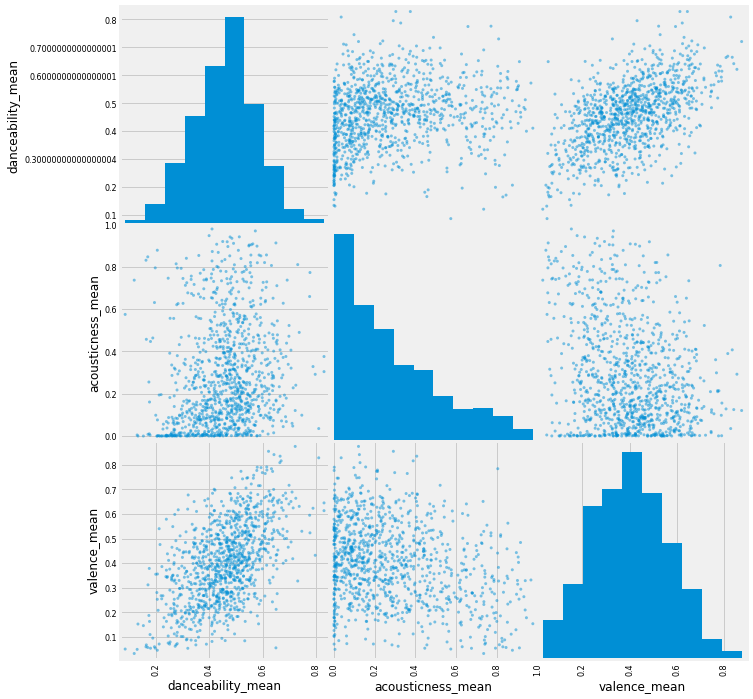

In [18]:
pd.plotting.scatter_matrix(rock_df[x_cols_mean], figsize=(10,12));

In [22]:
rock_df['acousticness_mean'] = rock_df['acousticness_mean'].map(lambda x: np.log(x))

In [23]:
# refit model with adjusted variables
outcome = 'score_amax'
x_cols_mean = ['danceability_mean', 'acousticness_mean', 'valence_mean']
predictors = '+'.join(x_cols_mean)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=rock_df).fit()
model.summary()

ValueError: zero-size array to reduction operation maximum which has no identity